In [137]:
import pandas as pd
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [138]:
#@title Performing EDA
df = df.rename ({'Delivery Time':'DT' , 'Sorting Time':'ST'},axis=1)
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [140]:
df.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [141]:
df.isnull().sum()

DT    0
ST    0
dtype: int64

In [142]:
df[df.duplicated()]

,DT,ST


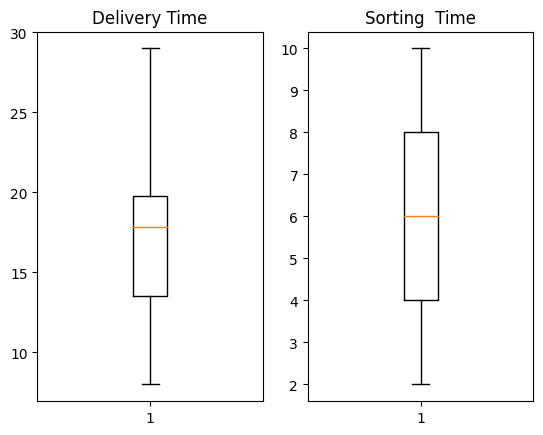

In [143]:
#FINDING OUTLIERS
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.boxplot(df['DT'])
plt.title('Delivery Time')

plt.subplot(1,2,2)
plt.boxplot(df['ST'])
plt.title('Sorting  Time')

plt.show()

In [144]:
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<Axes: xlabel='ST', ylabel='DT'>

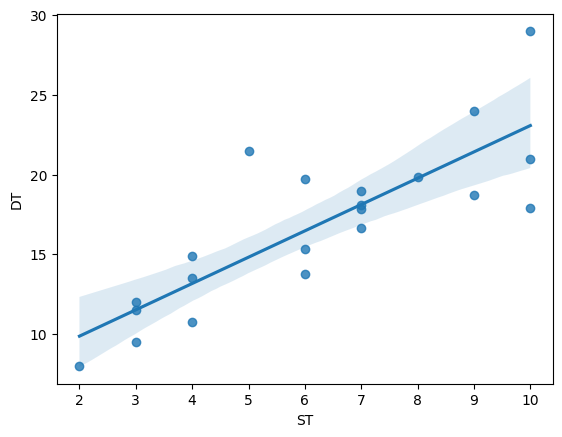

In [145]:
import seaborn as sns
sns.regplot(x=df['ST'],y=df['DT'])

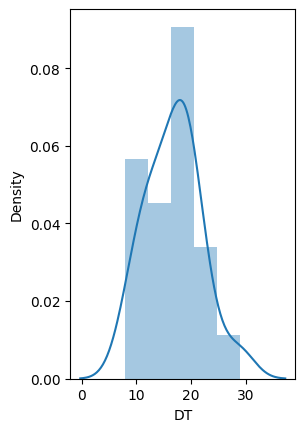

<Axes: xlabel='DT', ylabel='Density'>

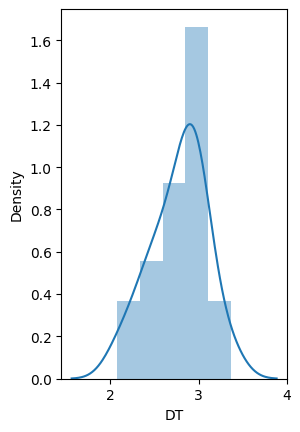

In [146]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
plt.subplot(1,2,1)
sns.distplot(df['DT'])
plt.show()

plt.subplot(1,2,2)
sns.distplot(np.log(df['DT'])) #Removing the squeness of the graph using log function

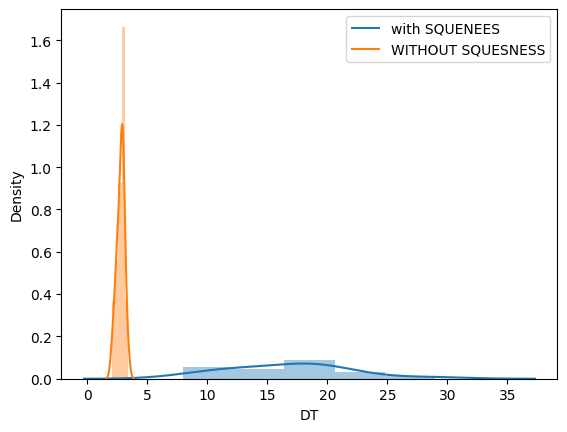

In [147]:
#Comparing the both the plot
sns.distplot(df['DT'])
sns.distplot(np.log(df['DT']))
labels = ['with SQUENEES','WITHOUT SQUESNESS']
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'Tranformation model using LOG')

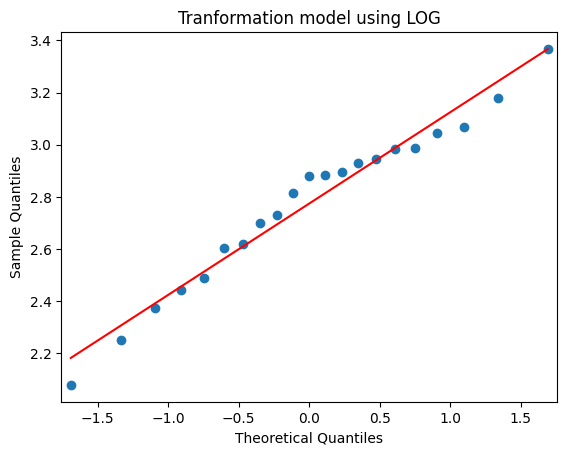

In [148]:
#Applying the duffernet tranformation model usinf Q-Qplot
import statsmodels.api as smf
smf.qqplot(np.log(df['DT']),line='r')
plt.title('Tranformation model using LOG')

Text(0.5, 1.0, 'Tranformation model using Square root ')

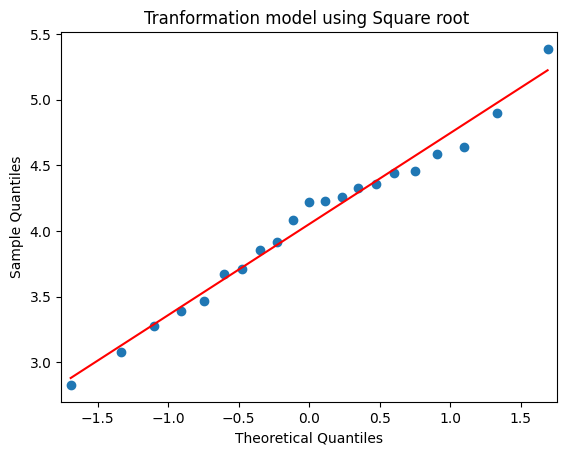

In [149]:
smf.qqplot(np.sqrt(df['DT']),line='r')
plt.title('Tranformation model using Square root ')

Text(0.5, 1.0, 'Tranformation model using cube root ')

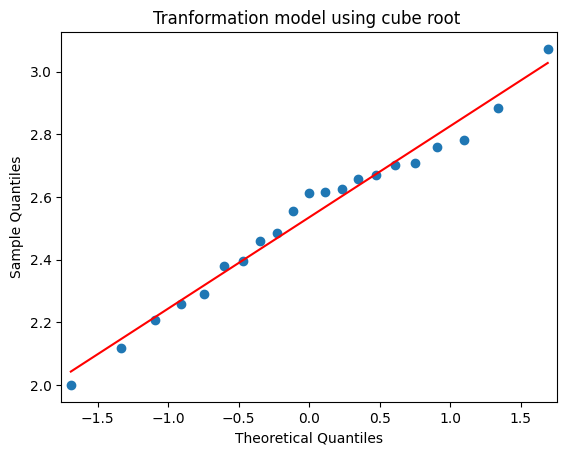

In [150]:
smf.qqplot(np.cbrt(df['DT']),line='r')
plt.title('Tranformation model using cube root ')

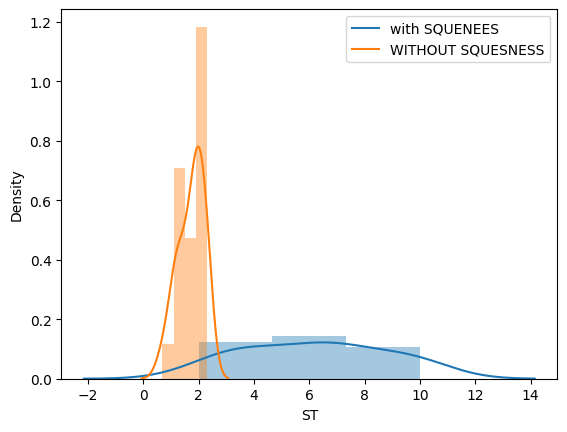

In [151]:
#perfomring all the previous operation on sorting time
sns.distplot(df['ST'])
sns.distplot(np.log(df['ST']))
labels = ['with SQUENEES','WITHOUT SQUESNESS']
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'Tranformation model using LOG')

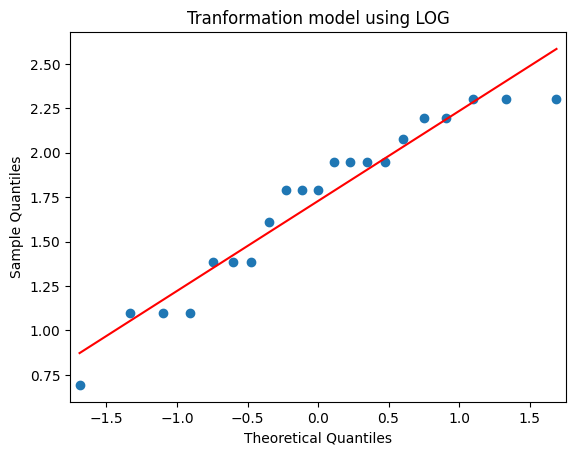

In [152]:
smf.qqplot(np.log(df['ST']),line='r')
plt.title('Tranformation model using LOG')

Text(0.5, 1.0, 'Tranformation model using Square root ')

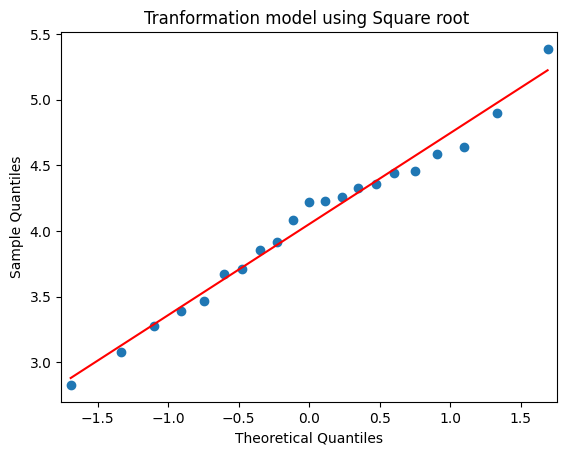

In [153]:
smf.qqplot(np.sqrt(df['DT']),line='r')
plt.title('Tranformation model using Square root ')

Text(0.5, 1.0, 'Tranformation model using cube root ')

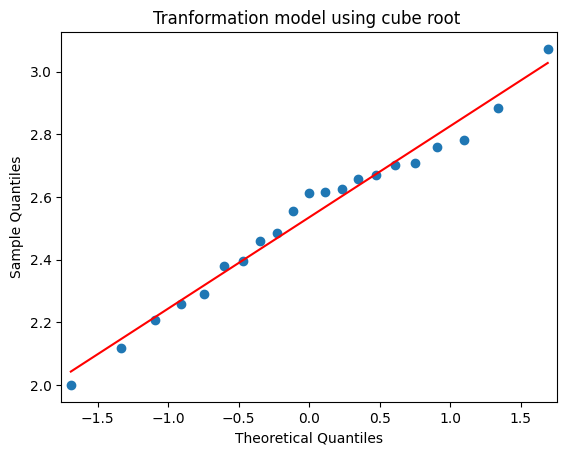

In [154]:
smf.qqplot(np.cbrt(df['DT']),line='r')
plt.title('Tranformation model using cube root ')

In [155]:
import statsmodels.formula.api as smf
model=smf.ols('DT~ST',data=df).fit()
model1=smf.ols('np.log(DT)~np.log(ST)',data=df).fit()#logisticc transformation model
model2=smf.ols('np.sqrt(DT)~np.sqrt(ST)',data=df).fit()#square root transformation model
model3=smf.ols('np.cbrt(DT)~np.cbrt(ST)',data=df).fit()#cube root transformation model

In [156]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [157]:
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [158]:
newdata=pd.Series([20,40,50])
newdata

0    20
1    40
2    50
dtype: int64

In [159]:
data_pred=pd.DataFrame(newdata,columns=['ST'])
data_pred

,ST
0,20
1,40
2,50


In [ ]:
print('prediction on normal trnaformation:-\n',model.predict(data_pred,'\n\n'))
print('prediction on logistic trnsormation:-\n',model1.predict(data_pred),'\n\n')
print('prediction on squre root trnsormation:\n-',model2.predict(data_pred),'\n\n')
print('prediction on cube root trnsormation:-\n',model3.predict(data_pred),'\n\n')

Salry Data


In [161]:
sal = pd.read_csv('Salary_Data.csv')
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [162]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [163]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [164]:
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [165]:
sal[sal.duplicated()]

,YearsExperience,Salary


In [166]:
sal  = sal.rename({'YearsExperience':'Experience'},axis=1)
sal.head()

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


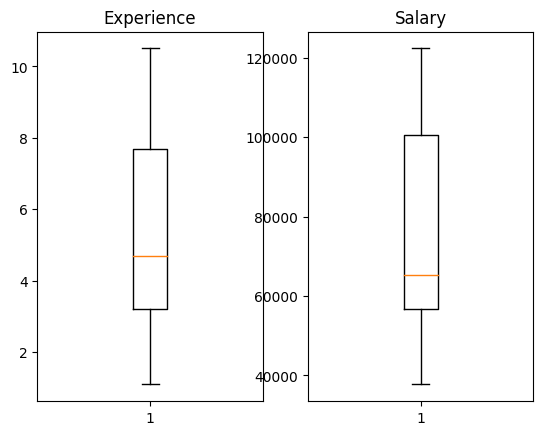

In [167]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.boxplot(sal['Experience'])
plt.title('Experience')

plt.subplot(1,2,2)
plt.boxplot(sal['Salary'])
plt.title('Salary')

plt.show()

In [168]:
sal.corr()

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Experience', ylabel='Salary'>

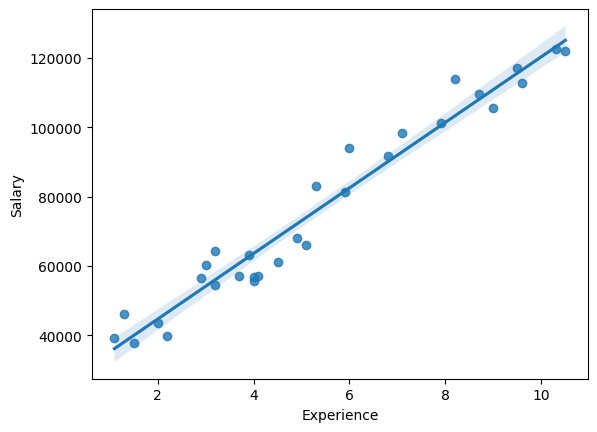

In [169]:
sns.regplot(x=sal['Experience'],y=sal['Salary'])

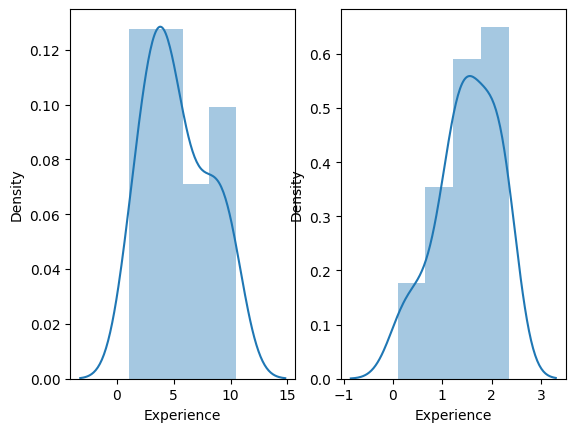

In [170]:
plt.subplot(1,2,1)
sns.distplot(sal['Experience'])

plt.subplot(1,2,2)
sns.distplot(np.log(sal['Experience']))

plt.show()

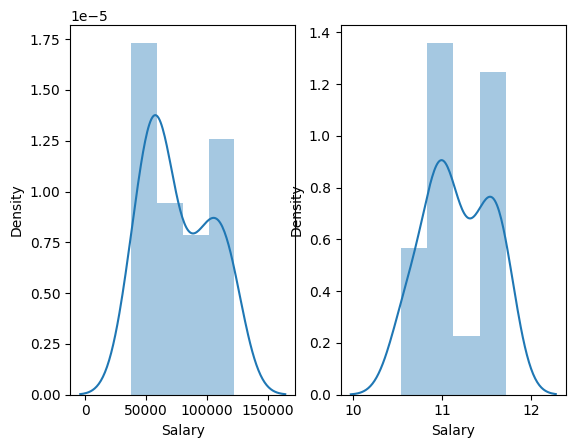

In [171]:
plt.subplot(1,2,1)
sns.distplot(sal['Salary'])

plt.subplot(1,2,2)
sns.distplot(np.log(sal['Salary']))

plt.show()

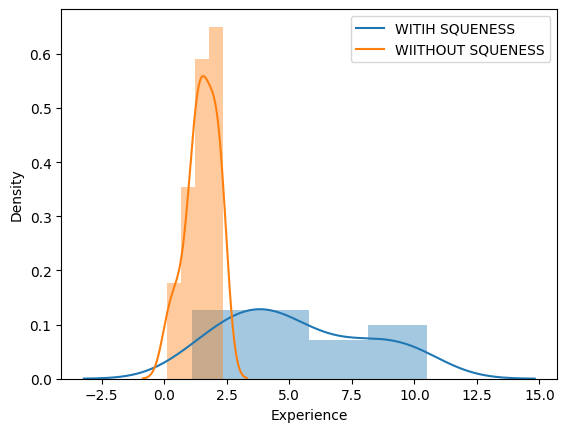

In [172]:
lables=['WITIH SQUENESS','WIITHOUT SQUENESS']
sns.distplot(sal['Experience'])
sns.distplot(np.log(sal['Experience']))
plt.legend(lables)

Text(0.5, 1.0, 'Tranformation model using cube root ')

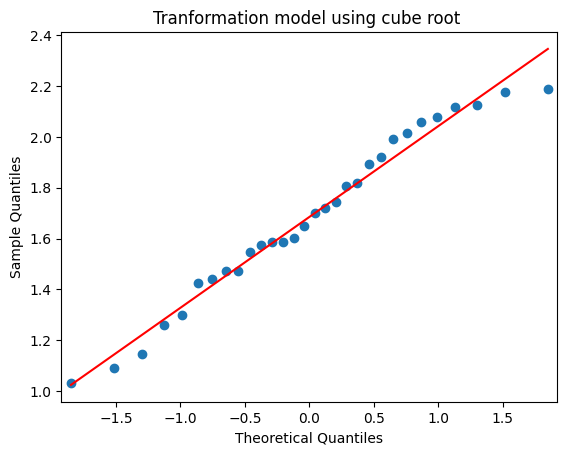

In [174]:
import statsmodels.api as smf
smf.qqplot(np.cbrt(sal['Experience']),line='r')
plt.title('Tranformation model using cube root ')

Text(0.5, 1.0, 'Tranformation model using logistic ')

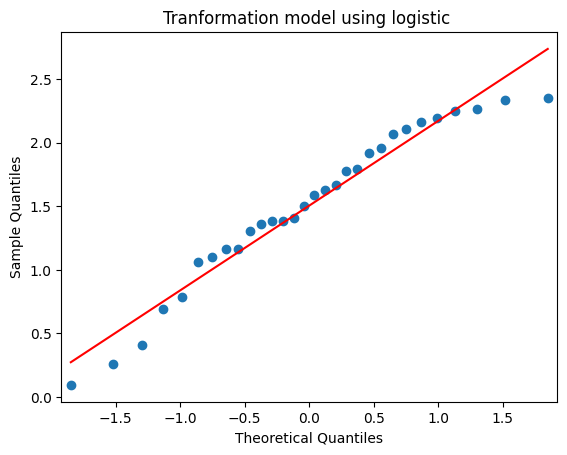

In [175]:
smf.qqplot(np.log(sal['Experience']),line='r')
plt.title('Tranformation model using logistic ')

Text(0.5, 1.0, 'Tranformation model using squre root ')

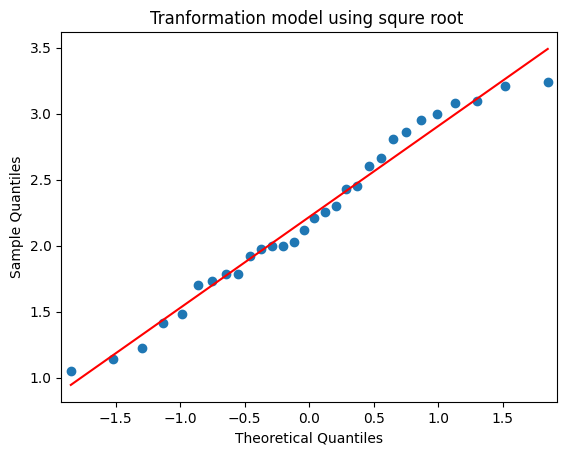

In [176]:
smf.qqplot(np.sqrt(sal['Experience']),line='r')
plt.title('Tranformation model using squre root ')

Text(0.5, 1.0, 'Tranformation model using square root ')

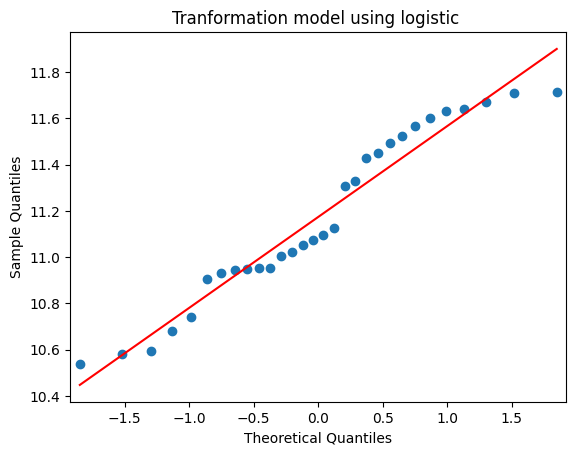

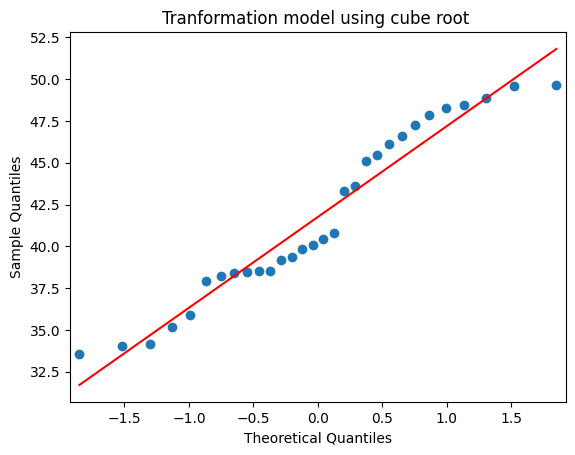

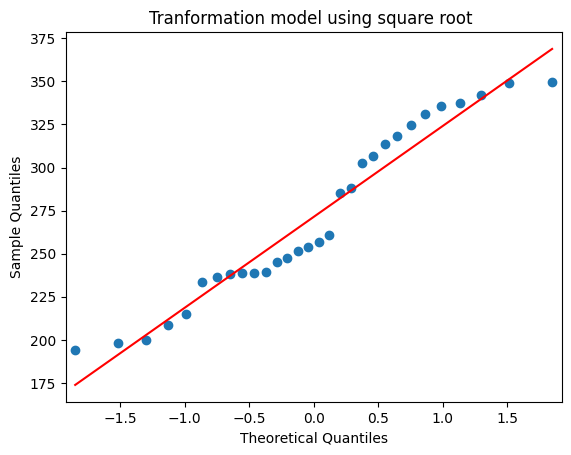

In [179]:
smf.qqplot(np.log(sal['Salary']),line='r')
plt.title('Tranformation model using logistic ')

smf.qqplot(np.cbrt(sal['Salary']),line='r')
plt.title('Tranformation model using cube root ')

smf.qqplot(np.sqrt(sal['Salary']),line='r')
plt.title('Tranformation model using square root ')

In [181]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~Experience',data=sal).fit()
model1=smf.ols('np.log(Salary)~np.log(Experience)',data=sal).fit()#logisticc transformation model
model2=smf.ols('np.sqrt(Salary)~np.sqrt(Experience)',data=sal).fit()#square root transformation model
model3=smf.ols('np.cbrt(Salary)~np.cbrt(Experience)',data=sal).fit()#cube root transformation model

In [ ]:
print(model.params,'\n\n')
print(model1.params,'\n\n')
print(model2.params,'\n\n')
print(model3.params,'\n\n')

In [ ]:
print(model.pvalues,'\n',model.tvalues,'\n\n')
print(model1.pvalues,'\n',model1.tvalues,'\n\n')
print(model2.pvalues,'\n',model2.tvalues,'\n\n')
print(model3.pvalues,'\n',model3.tvalues,'\n\n')

In [187]:
#Prediting the salary for 5 Years of Experience
new_data=pd.Series([5])

In [188]:
data_pred =pd.DataFrame(new_data,columns=['Experience'])

In [189]:
print('prediction on normal trnaformation:-\n',model.predict(data_pred,'\n\n'))
print('prediction on logistic trnsormation:-\n',model1.predict(data_pred),'\n\n')
print('prediction on squre root trnsormation:\n-',model2.predict(data_pred),'\n\n')
print('prediction on cube root trnsormation:-\n',model3.predict(data_pred),'\n\n')

prediction on normal trnaformation:-
 0    73042.011806
dtype: float64
prediction on logistic trnsormation:-
 0    11.23269
dtype: float64 


prediction on squre root trnsormation:
- 0    272.674991
dtype: float64 


prediction on cube root trnsormation:-
 0    42.132509
dtype: float64 


